In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import image
from matplotlib import pyplot as plt

In [2]:
label_df = pd.read_csv('CTR_Logs.txt', sep=' ', header=None, usecols=[0, 2, 4, 5, 7, 8, 10, 11, 13, 14])
label_df.columns = ['xray_fname', 'ctr', 'rc_x', 'rc_y', 'rh_x', 'rh_y', 'lh_x', 'lh_y', 'lc_x', 'lc_y']
label_cols = ['rc_x', 'rc_y', 'rh_x', 'rh_y', 'lh_x', 'lh_y', 'lc_x', 'lc_y']
label_df[label_cols] = label_df[label_cols].round(0).astype(int)
label_df['width'], label_df['height'] = 0, 0
label_df

,xray_fname,ctr,rc_x,rc_y,rh_x,rh_y,lh_x,lh_y,lc_x,lc_y,width,height
0,view1_frontal01.jpg,0.3114,320,1654,1214,1552,1860,1605,2395,1676,0,0
1,view1_frontal0100.jpg,0.5951,436,1735,1023,1566,2166,1708,2357,1725,0,0
2,view1_frontal0101.jpg,0.5317,329,1893,1010,1661,2113,1860,2404,1912,0,0
3,view1_frontal0103.jpg,0.5330,317,869,881,924,1635,1235,1731,881,0,0
4,view1_frontal0106.jpg,0.6726,838,1314,1306,1226,2448,1438,2536,1332,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
197,view1_frontal096.jpg,0.5991,564,1800,1431,1908,3000,2085,3183,1848,0,0
198,view1_frontal097.jpg,0.5931,688,1322,1276,1258,2232,1388,2300,1330,0,0
199,view1_frontal098.jpg,0.4263,126,1472,724,1428,1424,1554,1768,1500,0,0
200,view2_frontal054.jpg,0.4962,158,1282,612,1232,1396,1290,1738,1286,0,0


(2320, 2828)


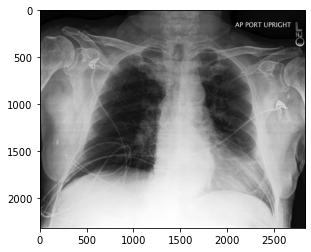

In [3]:
im = image.imread('./xray_images/view1_frontal01.jpg')
print(im.shape)
plt.imshow(im, cmap='gray')
plt.show()

In [4]:
# Get the dimension of each xray file
xray_images_path = './xray_images/'
for i in range(label_df.shape[0]):
    fname = label_df.xray_fname[i]
    im = image.imread(os.path.join(xray_images_path, fname))
    label_df.loc[i, 'height'], label_df.loc[i, 'width'] = im.shape

label_df

,xray_fname,ctr,rc_x,rc_y,rh_x,rh_y,lh_x,lh_y,lc_x,lc_y,width,height
0,view1_frontal01.jpg,0.3114,320,1654,1214,1552,1860,1605,2395,1676,2828,2320
1,view1_frontal0100.jpg,0.5951,436,1735,1023,1566,2166,1708,2357,1725,2828,2320
2,view1_frontal0101.jpg,0.5317,329,1893,1010,1661,2113,1860,2404,1912,2828,2320
3,view1_frontal0103.jpg,0.5330,317,869,881,924,1635,1235,1731,881,2021,1631
4,view1_frontal0106.jpg,0.6726,838,1314,1306,1226,2448,1438,2536,1332,2828,2320
...,...,...,...,...,...,...,...,...,...,...,...,...
197,view1_frontal096.jpg,0.5991,564,1800,1431,1908,3000,2085,3183,1848,4240,3480
198,view1_frontal097.jpg,0.5931,688,1322,1276,1258,2232,1388,2300,1330,2828,2320
199,view1_frontal098.jpg,0.4263,126,1472,724,1428,1424,1554,1768,1500,1931,2011
200,view2_frontal054.jpg,0.4962,158,1282,612,1232,1396,1290,1738,1286,2022,1751


In [5]:
# Create masks
out_path = './masks'

if not os.path.exists(out_path):
    os.makedirs(out_path)

for i in range(label_df.shape[0]):
    fname = label_df.xray_fname[i]
    width = label_df.loc[i, 'width']
    height = label_df.loc[i, 'height']
    
    mask_array = np.zeros((height, width), dtype=np.uint8)
    
    # horizontal x and vertical y with origin at top left
    mask_array[label_df.rc_y[i], label_df.rc_x[i]] = 0.25 * 255
    mask_array[label_df.rh_y[i], label_df.rh_x[i]] = 0.50 * 255
    mask_array[label_df.lh_y[i], label_df.lh_x[i]] = 0.75 * 255
    mask_array[label_df.lc_y[i], label_df.lc_x[i]] = 1.00 * 255

    mask_path = os.path.join(out_path, fname[:-4]+'_mask.png')
    plt.imsave(mask_path, mask_array, cmap=plt.cm.gray)

[0. 0. 0. 1.]
0.0
(2320, 2828)


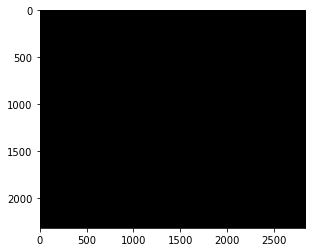

In [6]:
ii = 123
fname = './masks/'+label_df.xray_fname[ii][:-4]+'_mask.png'
# mask_example = image.imread(fname)
mask_example = image.imread(fname).round(2)
print(mask_example[label_df.lh_x[ii], label_df.lh_y[ii]])
mask_example_squeeze = mask_example[:,:,:1].squeeze()
print(mask_example_squeeze[label_df.lh_x[ii], label_df.lh_y[ii]])
print(mask_example_squeeze.shape)
plt.imshow(mask_example)
plt.show()

## Visualization

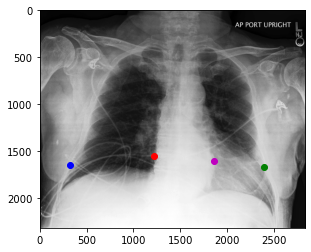

In [9]:
ii = 0
fname = os.path.join('./xray_images', label_df.xray_fname[ii])
im = image.imread(fname)
im_copy = im.copy()
# for i in range(label_df.rc_x[ii]-100, label_df.rc_x[ii]+100):
#     for j in range(label_df.rc_y[ii]-100, label_df.rc_y[ii]+100):
#         im_copy[i,j]=255
# plt.imshow(im_copy, cmap='gray')
plt.imshow(im, cmap='gray')
plt.plot(label_df.rc_x[ii], label_df.rc_y[ii], 'bo')
plt.plot(label_df.lc_x[ii], label_df.lc_y[ii], 'go')
plt.plot(label_df.rh_x[ii], label_df.rh_y[ii], 'ro')
plt.plot(label_df.lh_x[ii], label_df.lh_y[ii], 'mo')
plt.show()